### Créer la matrice d'adjacence:

Avec un masque et des valeurs de tenseurs de diffusion

In [3]:
# ! pip  install nibabel
!python 1_build_adj_matrix.py ../data/wm.nii.gz ../data/fodf.nii.gz graph

### Afficher le graphe: 

Figure(640x480)


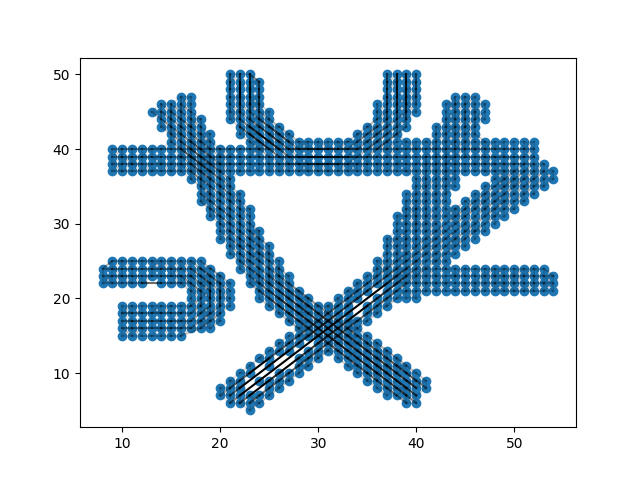

In [8]:
import sys

sys.path.append(r"C:\Users\harsh\quactography")

from IPython.display import Image, display  # type: ignore
!python 2_draw_adj_matrix.py graph.npz
display(Image(filename='graph_adj_mat.png'))


### Filtrer le graphe pour avoir uniquement les noeuds fortement connectés:

In [12]:
!python 1_build_adj_matrix.py ../data/wm.nii.gz ../data/fodf.nii.gz graph --threshold 0.4


Figure(640x480)


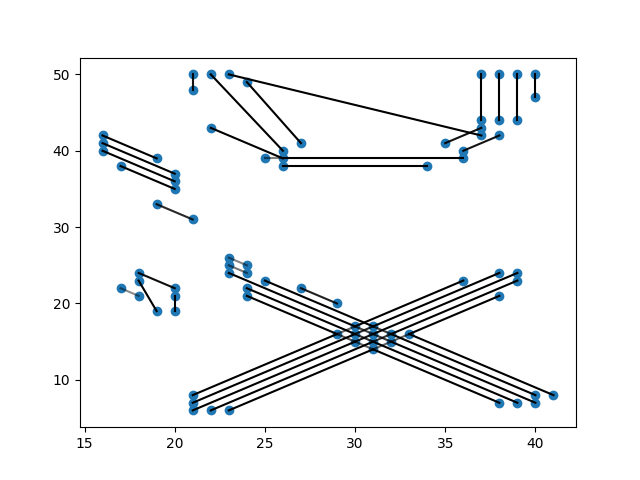

In [13]:
!python 2_draw_adj_matrix.py graph.npz
display(Image(filename='graph_adj_mat.png'))

### Créer une matrice d'adjacence aléatoire:

In [14]:
!python 1_build_random_adj_matrix.py 5 6 True rand_graph

4
6


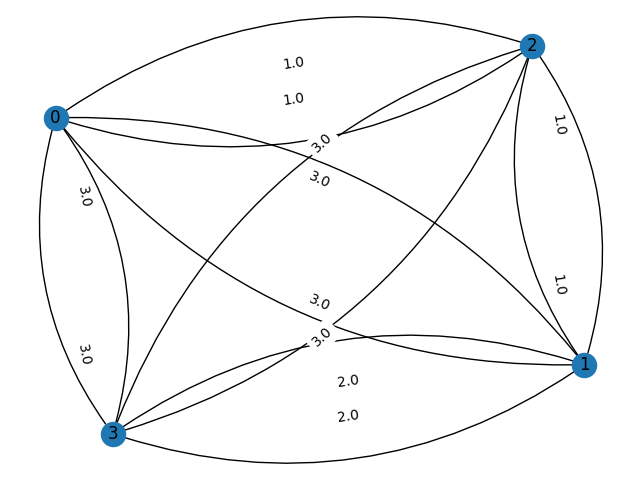

In [15]:
!python 2_draw_random_adj_matrix.py rand_graph rand_graph_visu
display(Image(filename='rand_graph_visu.png'))

### Lancer l'algorithme de qaoa pour maximiser la valeur absolue des poids: 

nom de la matrice d'adjacence, noeud départ, noeud fin, nom du fichier d'infos, valeurs de la constante de pénalité, nombre de répétitions de QAOA, nombre de processeurs 

In [16]:
!python 3_find_max_intensity_diffusion_path.py rand_graph 1 0 qaoa_solver_infos --alphas 1 2 3  --reps 1  -npr 1

[0, 0, 0, 0, 1, 1, 2, 2, 3]
[1, 2, 3, 4, 2, 4, 3, 4, 4]
[array([1, 1, 1, 1, 1, 1, 1, 1, 1])]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
total : SparsePauliOp(['IIIIIIIII', 'IIIIIIIIZ', 'IIIIIIIZI', 'IIIIIIZII', 'IIIIIZIII', 'IIZIIIIII', 'IZIIIIIII', 'ZIIIIIIII', 'IIIZZIIII', 'IIIIZIIIZ', 'IIIZIIIIZ', 'IIIIIIIZZ', 'IIIIIIZIZ', 'IIIIIZIIZ', 'IIIIIIZZI', 'IIIIIZIZI', 'IIIIIZZII', 'IZZIZIIZI', 'ZIZIIIZII', 'ZZIZIZIII'],
              coeffs=[ 5. +0.j, -1. +0.j, -0.5+0.j, -0.5+0.j, -0.5+0.j,  0.5+0.j,  0.5+0.j,
  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,
  0.5+0.j,  0.5+0.j,  0.5+0.j, -2. +0.j, -2. +0.j, -2. +0.j])
exact cost [-4.5+0.j -4.5+0.j -4.5+0.j]
quantum read ['111010010']
total

 Cost for path (classical read -> left=q0) 010010111  :  -4.5
mandatory

 Cost for path (classical read -> left=q0) 010010111  :  4.5
start

 Cost for path (classical read -> left=q0) 010010111  :  0.0
finish

 Cost for path (classical read -> left=q0) 010010111  :  0.0
int

 Cost for path (clas

### Visualiser les chemins qui maximise la valeur absolue des poids:

In [20]:
from IPython.display import Image, display  # type: ignore
!python 4_plot_distribution_probabilities.py qaoa_solver_infos_alpha_1.npz qaoa_solver_infos_alpha_2.npz qaoa_solver_infos_alpha_3.npz visu_total_dist visu_selected_dist edge
# display(Image(filename='visu_selected_dist.png'))
# display(Image(filename=r'..\output\img\visu_tout_alpha_4.png'))

[0, 0, 0, 0, 1, 1, 2, 2, 3]
[1, 2, 3, 4, 2, 4, 3, 4, 4]
[array([1, 1, 1, 1, 1, 1, 1, 1, 1])]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
SparsePauliOp(['IIIII', 'IIZII', 'ZZIZZ', 'ZZZZZ', 'IZIII', 'ZIZIZ', 'ZZZIZ', 'ZIIII', 'IZZZZ'],
              coeffs=[12.+0.j, -4.+0.j, -4.+0.j,  8.+0.j, -4.+0.j, -4.+0.j,  4.+0.j, -4.+0.j,
 -4.+0.j])
total : SparsePauliOp(['IIIII', 'IIIIZ', 'IIIZI', 'IIIZZ', 'IIZII', 'IIZIZ', 'IZIII', 'IZIIZ', 'ZIIII', 'ZIIIZ', 'IIZZI', 'ZIIZI', 'IZZII', 'ZIZII', 'ZZIII', 'IIZZZ', 'ZIIZZ', 'ZIZZI', 'IZIZI', 'IZIZZ', 'IZZIZ', 'ZIZIZ', 'ZZIIZ', 'ZZIZZ', 'ZZZZZ', 'ZZZIZ', 'IZZZZ'],
              coeffs=[ 50.  +0.j, -11.  +0.j,  -7.25+0.j,  12.25+0.j, -15.  +0.j,  12.25+0.j,
 -11.25+0.j,   8.25+0.j, -15.  +0.j,  12.25+0.j,   8.25+0.j,   8.25+0.j,
   4.25+0.j,   8.25+0.j,   4.25+0.j,  -8.  +0.j,  -8.  +0.j,  -4.  +0.j,
   4.  +0.j,  -4.  +0.j,  -4.  +0.j,  -8.  +0.j,  -4.  +0.j,  -4.  +0.j,
   8.  +0.j,   4.  +0.j,  -4.  +0.j])
[-1.25+0.j]
['11']
total

 Cost for path (classical read ->

### Visualiser les chemins optimaux:

[0, 0, 0, 0, 1, 1, 2, 2, 3]
[1, 2, 3, 4, 2, 4, 3, 4, 4]
[array([1, 1, 1, 1, 1, 1, 1, 1, 1])]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
SparsePauliOp(['IIIII', 'IIZII', 'ZZIZZ', 'ZZZZZ', 'IZIII', 'ZIZIZ', 'ZZZIZ', 'ZIIII', 'IZZZZ'],
              coeffs=[12.+0.j, -4.+0.j, -4.+0.j,  8.+0.j, -4.+0.j, -4.+0.j,  4.+0.j, -4.+0.j,
 -4.+0.j])
total : SparsePauliOp(['IIIII', 'IIIIZ', 'IIIZI', 'IIIZZ', 'IIZII', 'IIZIZ', 'IZIII', 'IZIIZ', 'ZIIII', 'ZIIIZ', 'IIZZI', 'ZIIZI', 'IZZII', 'ZIZII', 'ZZIII', 'IIZZZ', 'ZIIZZ', 'ZIZZI', 'IZIZI', 'IZIZZ', 'IZZIZ', 'ZIZIZ', 'ZZIIZ', 'ZZIZZ', 'ZZZZZ', 'ZZZIZ', 'IZZZZ'],
              coeffs=[ 50.  +0.j, -11.  +0.j,  -7.25+0.j,  12.25+0.j, -15.  +0.j,  12.25+0.j,
 -11.25+0.j,   8.25+0.j, -15.  +0.j,  12.25+0.j,   8.25+0.j,   8.25+0.j,
   4.25+0.j,   8.25+0.j,   4.25+0.j,  -8.  +0.j,  -8.  +0.j,  -4.  +0.j,
   4.  +0.j,  -4.  +0.j,  -4.  +0.j,  -8.  +0.j,  -4.  +0.j,  -4.  +0.j,
   8.  +0.j,   4.  +0.j,  -4.  +0.j])
[-1.25+0.j]
['11']
total

 Cost for path (classical read ->

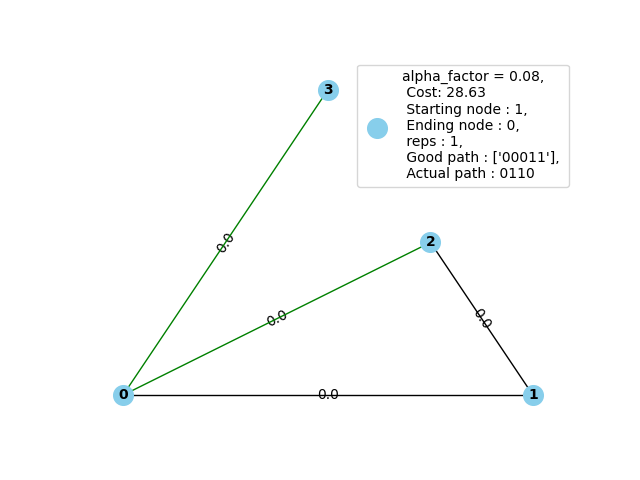

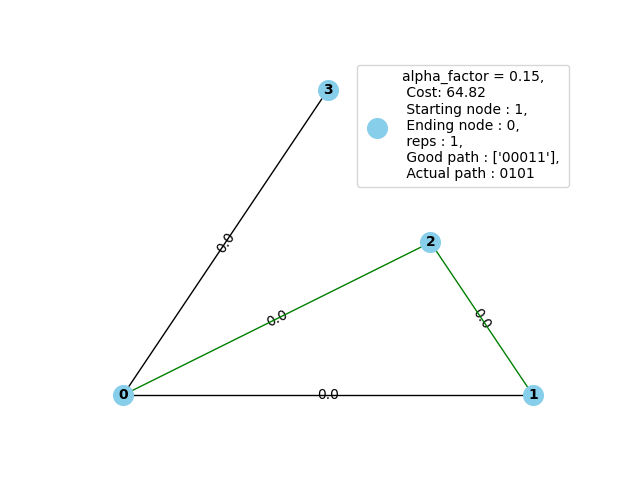

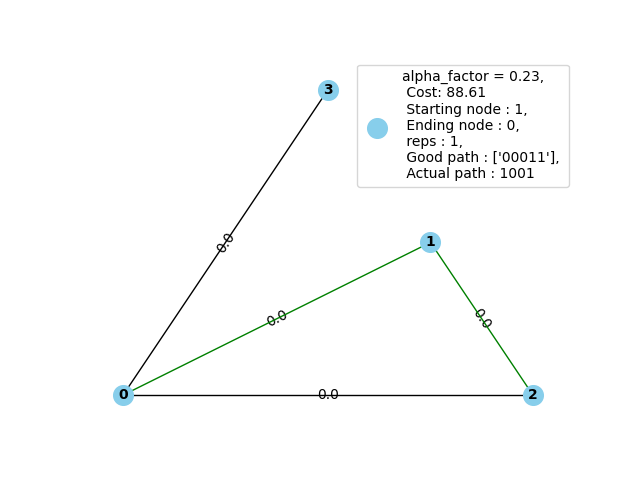

In [22]:
!python 5_plot_optimal_paths.py graph qaoa_solver_infos_alpha_1.npz qaoa_solver_infos_alpha_2.npz qaoa_solver_infos_alpha_3.npz opt_paths edge
display(Image(filename='opt_paths_0_alpha_1.00.png'))
display(Image(filename='opt_paths_1_alpha_2.00.png'))
display(Image(filename='opt_paths_2_alpha_3.00.png'))